In [2]:
import rdflib
from igraph import *
%matplotlib inline

In [3]:
g=rdflib.Graph()
g.load('http://dbpedia.org/resource/Mammal')

graph = Graph(directed=True)

for s,p,o in g:
    try:
        graph.vs.find(name=s)
    except ValueError:
        graph.add_vertex(name=s)    
        
    try:
        graph.vs.find(name=o)
    except ValueError:
        graph.add_vertex(name=o)
        
    graph.add_edge(s, o, name=p)
    
g=rdflib.Graph()
g.load('http://dbpedia.org/resource/Bird')

graph2 = Graph(directed=True)

for s,p,o in g:
    try:
        graph2.vs.find(name=s)
    except ValueError:
        graph2.add_vertex(name=s) 
        
    try:
        graph2.vs.find(name=o)
    except ValueError:
        graph2.add_vertex(name=o)
        
    graph2.add_edge(s, o, name=p)

In [ ]:
plot(graph, layout=None, 
     vertex_label=[vertex.attributes()['name'].split('/')[-1].encode('utf-8') for vertex in graph.vs],
     vertex_label_size=4, 
     edge_label=[edge.attributes()['name'].split('/')[-1].encode('utf-8') for edge in graph.es],
     edge_label_size=4)

In [ ]:
plot(graph2, layout=None, 
     vertex_label=[vertex.attributes()['name'].split('/')[-1].encode('utf-8') for vertex in graph2.vs],
     vertex_label_size=4, 
     edge_label=[edge.attributes()['name'].split('/')[-1].encode('utf-8') for edge in graph2.es],
     edge_label_size=4)

In [5]:
def named_intersect(graph1, graph2):
    A = graph1.copy()
    B = graph2.copy() # so removed vertices don't affect original graphs
    Anams = set(A.vs['name'])
    Bnams = set(B.vs['name'])
    A.delete_vertices(Anams - Bnams)
    B.delete_vertices(Bnams - Anams)
    nams = sorted(Anams & Bnams)
#     Aind = [nams.index(nm) for nm in A.vs['name']]
#     Bind = [nams.index(nm) for nm in B.vs['name']]
#     A = A.permute_vertices(Aind)
#     B = B.permute_vertices(Bind)
    Z = A & B
    Z.vs['name'] = nams
    return Z

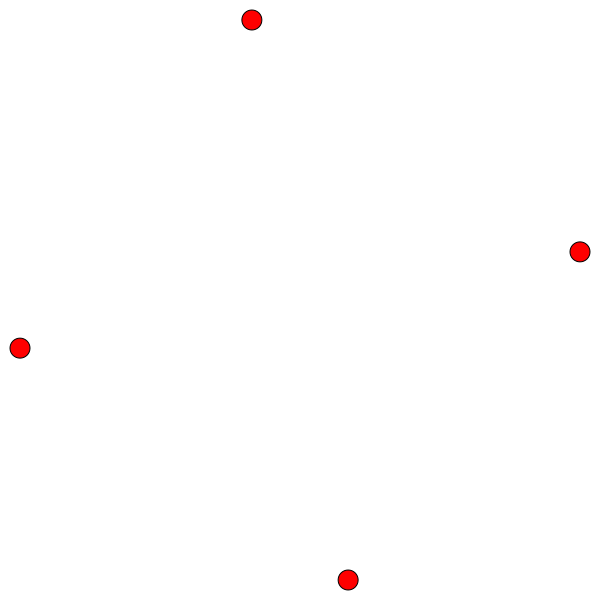

In [6]:
plot(named_intersect(graph, graph2))